In [1]:
import os
import sys
os.chdir("..") 
%matplotlib inline

In [2]:
# %load c302_MotorToMuscleSynTest.py
import c302
import neuroml.writers as writers

range_incl = lambda start, end:range(start, end + 1)

VA_motors = ["VA%s" % c for c in range_incl(1, 12)]
VB_motors = ["VB%s" % c for c in range_incl(1, 11)]
DA_motors = ["DA%s" % c for c in range_incl(1, 9)]
DB_motors = ["DB%s" % c for c in range_incl(1, 7)]
DD_motors = ["DD%s" % c for c in range_incl(1, 6)]
VD_motors = ["VD%s" % c for c in range_incl(1, 13)]
AS_motors = ["AS%s" % c for c in range_incl(1, 11)]

def setup(parameter_set,
          generate=False,
          duration=800,
          dt=0.05,
          target_directory='examples',
          data_reader="UpdatedSpreadsheetDataReader"):
    
    exec ('from parameters_%s import ParameterisedModel' % parameter_set)
    params = ParameterisedModel()

    params.set_bioparameter("unphysiological_offset_current", "0pA", "Testing TapWithdrawal", "0")
    params.set_bioparameter("unphysiological_offset_current_del", "0 ms", "Testing TapWithdrawal", "0")
    params.set_bioparameter("unphysiological_offset_current_dur", "2000 ms", "Testing TapWithdrawal", "0")

    cells = list(VB_motors + DB_motors + DD_motors + VD_motors + AS_motors)
    #cells += ['AVAL']
    #cells += ['DB6']

    muscles_to_include = ['MVL07']

  
    cells_to_stimulate = []

    cells_to_plot = ['VB7', 'VB8', 'DB6', 'DB7']
    reference = "c302_%s_MotorWithSinisoudalInput" % parameter_set

    conns_to_include = [
    ]

    conn_polarity_override = {
      
    }

    conn_number_override = {
    }

    
    print "CELLS TO PLOT: %s" % cells_to_plot
    

    if generate:
        nml_doc = c302.generate(reference,
                                params,
                                cells=cells,
                                cells_to_plot=cells_to_plot,
                                cells_to_stimulate=cells_to_stimulate,
                                conns_to_include=conns_to_include,
                                conn_polarity_override=conn_polarity_override,
                                conn_number_override=conn_number_override,
                                muscles_to_include=muscles_to_include,
                                duration=duration,
                                dt=dt,
                                target_directory=target_directory,
                                data_reader=data_reader)
        
        for vb in VB_motors:
            c302.add_new_sinusoidal_input(nml_doc, cell=vb, delay="0ms", duration="1000ms", amplitude="3pA",
                                          period="150ms", params=params)

        for db in DB_motors:
            c302.add_new_sinusoidal_input(nml_doc, cell=db, delay="0ms", duration="1000ms", amplitude="3pA",
                                          period="150ms", params=params)

        nml_file = target_directory + '/' + reference + '.nml'
        writers.NeuroMLWriter.write(nml_doc, nml_file)  # Write over network file written above...

        print("(Re)written network file to: " + nml_file)


    return cells, cells_to_stimulate, params, muscles_to_include, reference


w, x, y, z, reference = setup("C2", generate=True, data_reader="UpdatedSpreadsheetDataReader")

Set default parameters for C
Set default parameters for C2
CELLS TO PLOT: ['VB7', 'VB8', 'DB6', 'DB7']
c302      >>>  
c302      >>> 
c302      >>> Parameters and setting used to generate this network:
c302      >>> 
c302      >>>     Data reader:                    UpdatedSpreadsheetDataReader
c302      >>>     Cells:                          ['VB1', 'VB2', 'VB3', 'VB4', 'VB5', 'VB6', 'VB7', 'VB8', 'VB9', 'VB10', 'VB11', 'DB1', 'DB2', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DD1', 'DD2', 'DD3', 'DD4', 'DD5', 'DD6', 'VD1', 'VD2', 'VD3', 'VD4', 'VD5', 'VD6', 'VD7', 'VD8', 'VD9', 'VD10', 'VD11', 'VD12', 'VD13', 'AS1', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'AS10', 'AS11']
c302      >>>     Cell stimulated:                []
c302      >>>     Connection:                     []
c302      >>>     Connection numbers overridden:  {}
c302      >>>     Connection numbers scaled:      None
c302      >>>     Connection polarities override: {}
c302      >>>     Muscles:                

In [3]:
# Replace this with your model path.  
# This example is from https://github.com/OpenSourceBrain/IzhikevichModel.
LEMS_MODEL_PATH = 'examples/LEMS_%s.xml' % reference

In [4]:
from pyneuroml import pynml

pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorWithSinisoudalInput.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorWithSinisoudalInput.activity.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorWithSinisoudalInput.muscles.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorWithSinisoudalInput.muscles.activity.dat (jNeuroML)


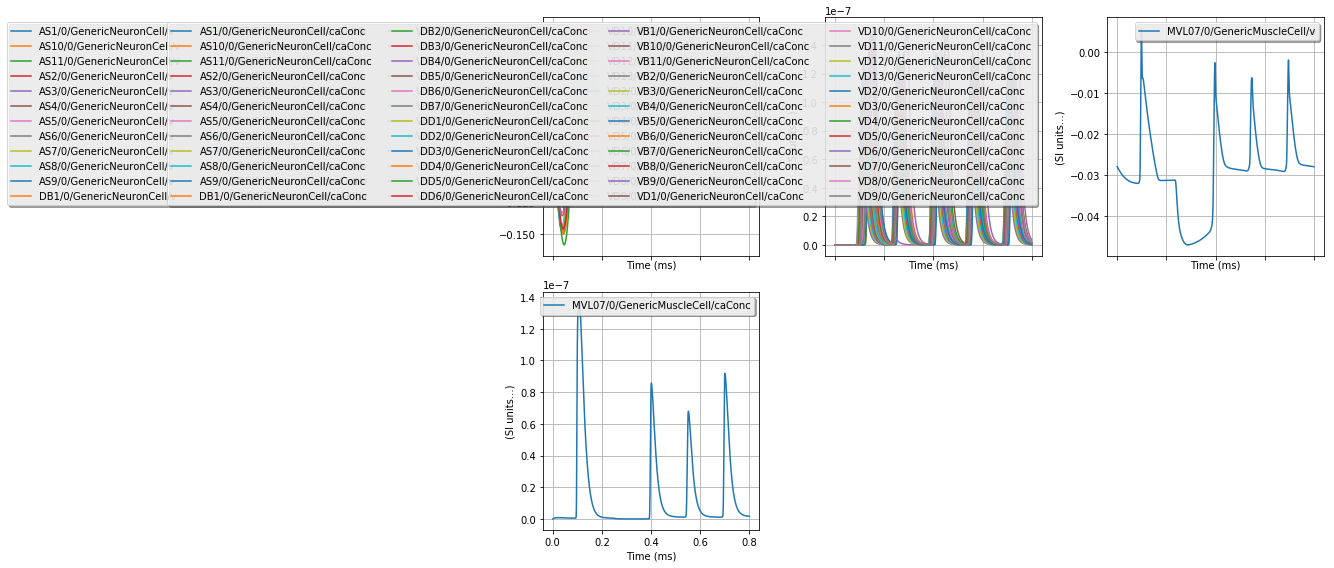

In [5]:
results = pynml.run_lems_with_jneuroml(os.path.split(LEMS_MODEL_PATH)[1], 
                             verbose=False, load_saved_data=True, nogui=True, 
                             exec_in_dir=os.path.split(LEMS_MODEL_PATH)[0],
                             plot=True)